In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('tae.data')

In [3]:
df

,eng_speaker,instructor,course,summer,class_size,class_attr
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


#### Attribute Information:

   1. Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

In [4]:
df.head()

,eng_speaker,instructor,course,summer,class_size,class_attr
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [5]:
df.shape

(151, 6)

In [6]:
df.describe()

,eng_speaker,instructor,course,summer,class_size,class_attr
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [7]:
df.dtypes

eng_speaker    int64
instructor     int64
course         int64
summer         int64
class_size     int64
class_attr     int64
dtype: object

In [8]:
df['eng_speaker'] = pd.Categorical(df['eng_speaker'])
df['instructor'] = pd.Categorical(df['instructor'])
df['course'] = pd.Categorical(df['course'])
df['summer'] = pd.Categorical(df['summer'])
df['class_attr'] = pd.Categorical(df['class_attr'])

In [9]:
df.dtypes

eng_speaker    category
instructor     category
course         category
summer         category
class_size        int64
class_attr     category
dtype: object

In [10]:
df.isna().sum()

eng_speaker    0
instructor     0
course         0
summer         0
class_size     0
class_attr     0
dtype: int64

/Users/nayankaushal/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


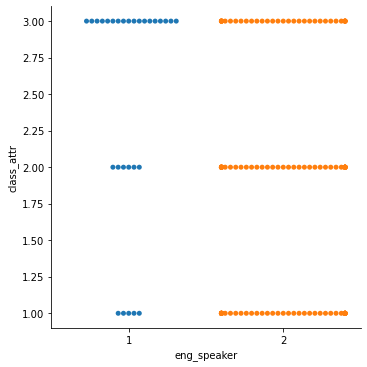

In [11]:
sns.catplot(data = df, x = 'eng_speaker', y = 'class_attr', kind = 'swarm')

Affects english speakers while values are similar for non-english speakers

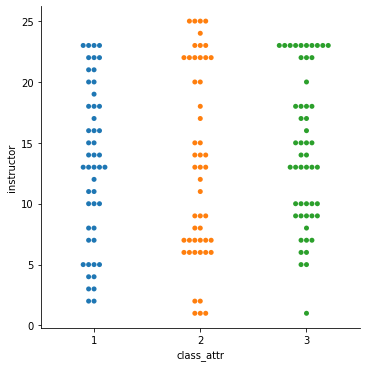

In [12]:
sns.catplot(data = df, y = 'instructor', x = 'class_attr', kind = 'swarm')

/Users/nayankaushal/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


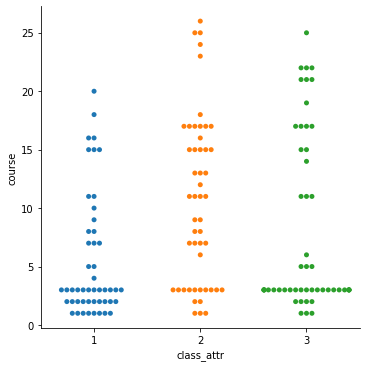

In [13]:
sns.catplot(data = df, y = 'course', x = 'class_attr', kind = 'swarm')

/Users/nayankaushal/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


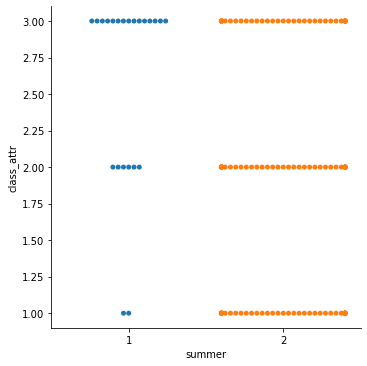

In [14]:
sns.catplot(data = df, x = 'summer', y = 'class_attr', kind = 'swarm')

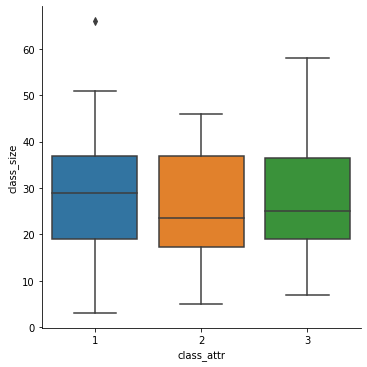

In [15]:
sns.catplot(data = df, x = 'class_attr', y = 'class_size', kind = 'box')

In [16]:
X = df.drop(columns = ['class_attr'])
y = df.loc[:, 'class_attr']

In [17]:
X

,eng_speaker,instructor,course,summer,class_size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


In [18]:
#splitting the datasets into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 5)
(46, 5)
(105,)
(46,)


In [19]:
## making predictions using the Linear Regression algorithm 
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

#Calculating the RMSE of training and testing data
accuracy = accuracy_score(y_test, y_pred)*100
display("Accuracy of Logistic Regression = {:.2f}%".format(accuracy))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

/Users/nayankaushal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'Accuracy of Logistic Regression = 47.83%'

[[9 2 2]
 [9 6 1]
 [3 7 7]]
              precision    recall  f1-score   support

           1       0.43      0.69      0.53        13
           2       0.40      0.38      0.39        16
           3       0.70      0.41      0.52        17

    accuracy                           0.48        46
   macro avg       0.51      0.49      0.48        46
weighted avg       0.52      0.48      0.48        46



In [20]:
pd.DataFrame({'y_test': y_test,'y_pred': y_pred})

,y_test,y_pred
20,2,1
134,2,2
48,3,3
73,1,1
92,3,2
78,3,3
108,1,3
44,3,3
136,2,1
95,2,1
